In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.getcwd())

df = pd.read_csv('../data/heart_cleveland_upload.csv')
df.head()

/Users/frankdelamota/Documents/heart-disease-prediction/notebooks


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [7]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Info about the dataset
print("\nDataset info:")
df.info()

Shape of the dataset: (297, 14)

Missing values:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  co

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [11]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


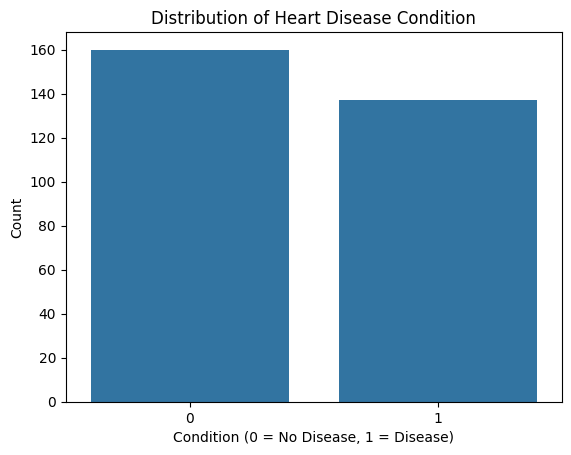

In [12]:
sns.countplot(x='condition', data=df)
plt.title('Distribution of Heart Disease Condition')
plt.xlabel('Condition (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()

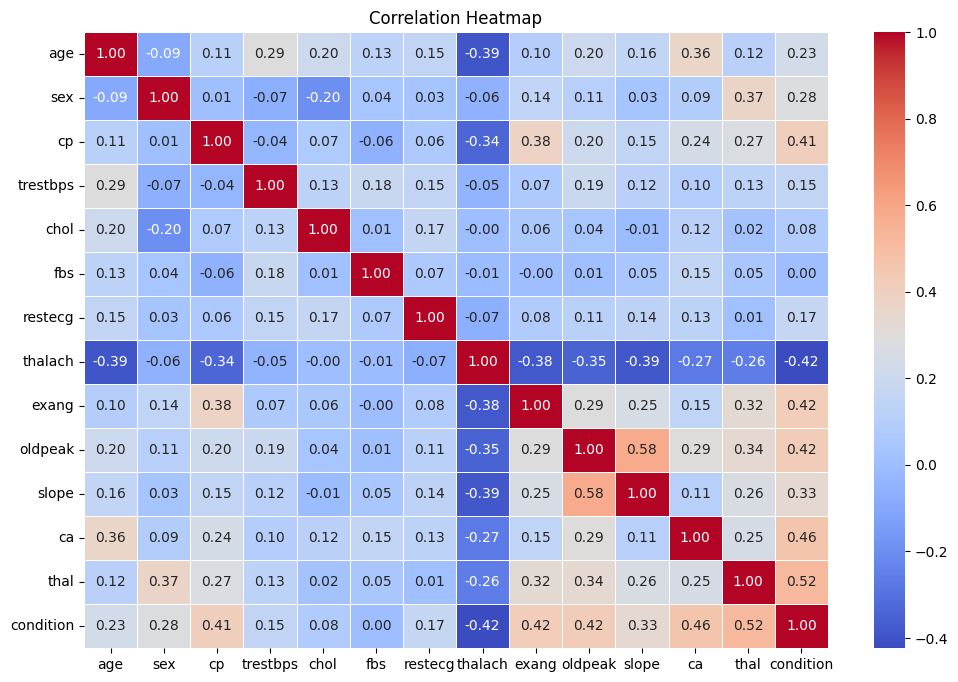

In [13]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Set the size of the heatmap
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title('Correlation Heatmap')
plt.show()

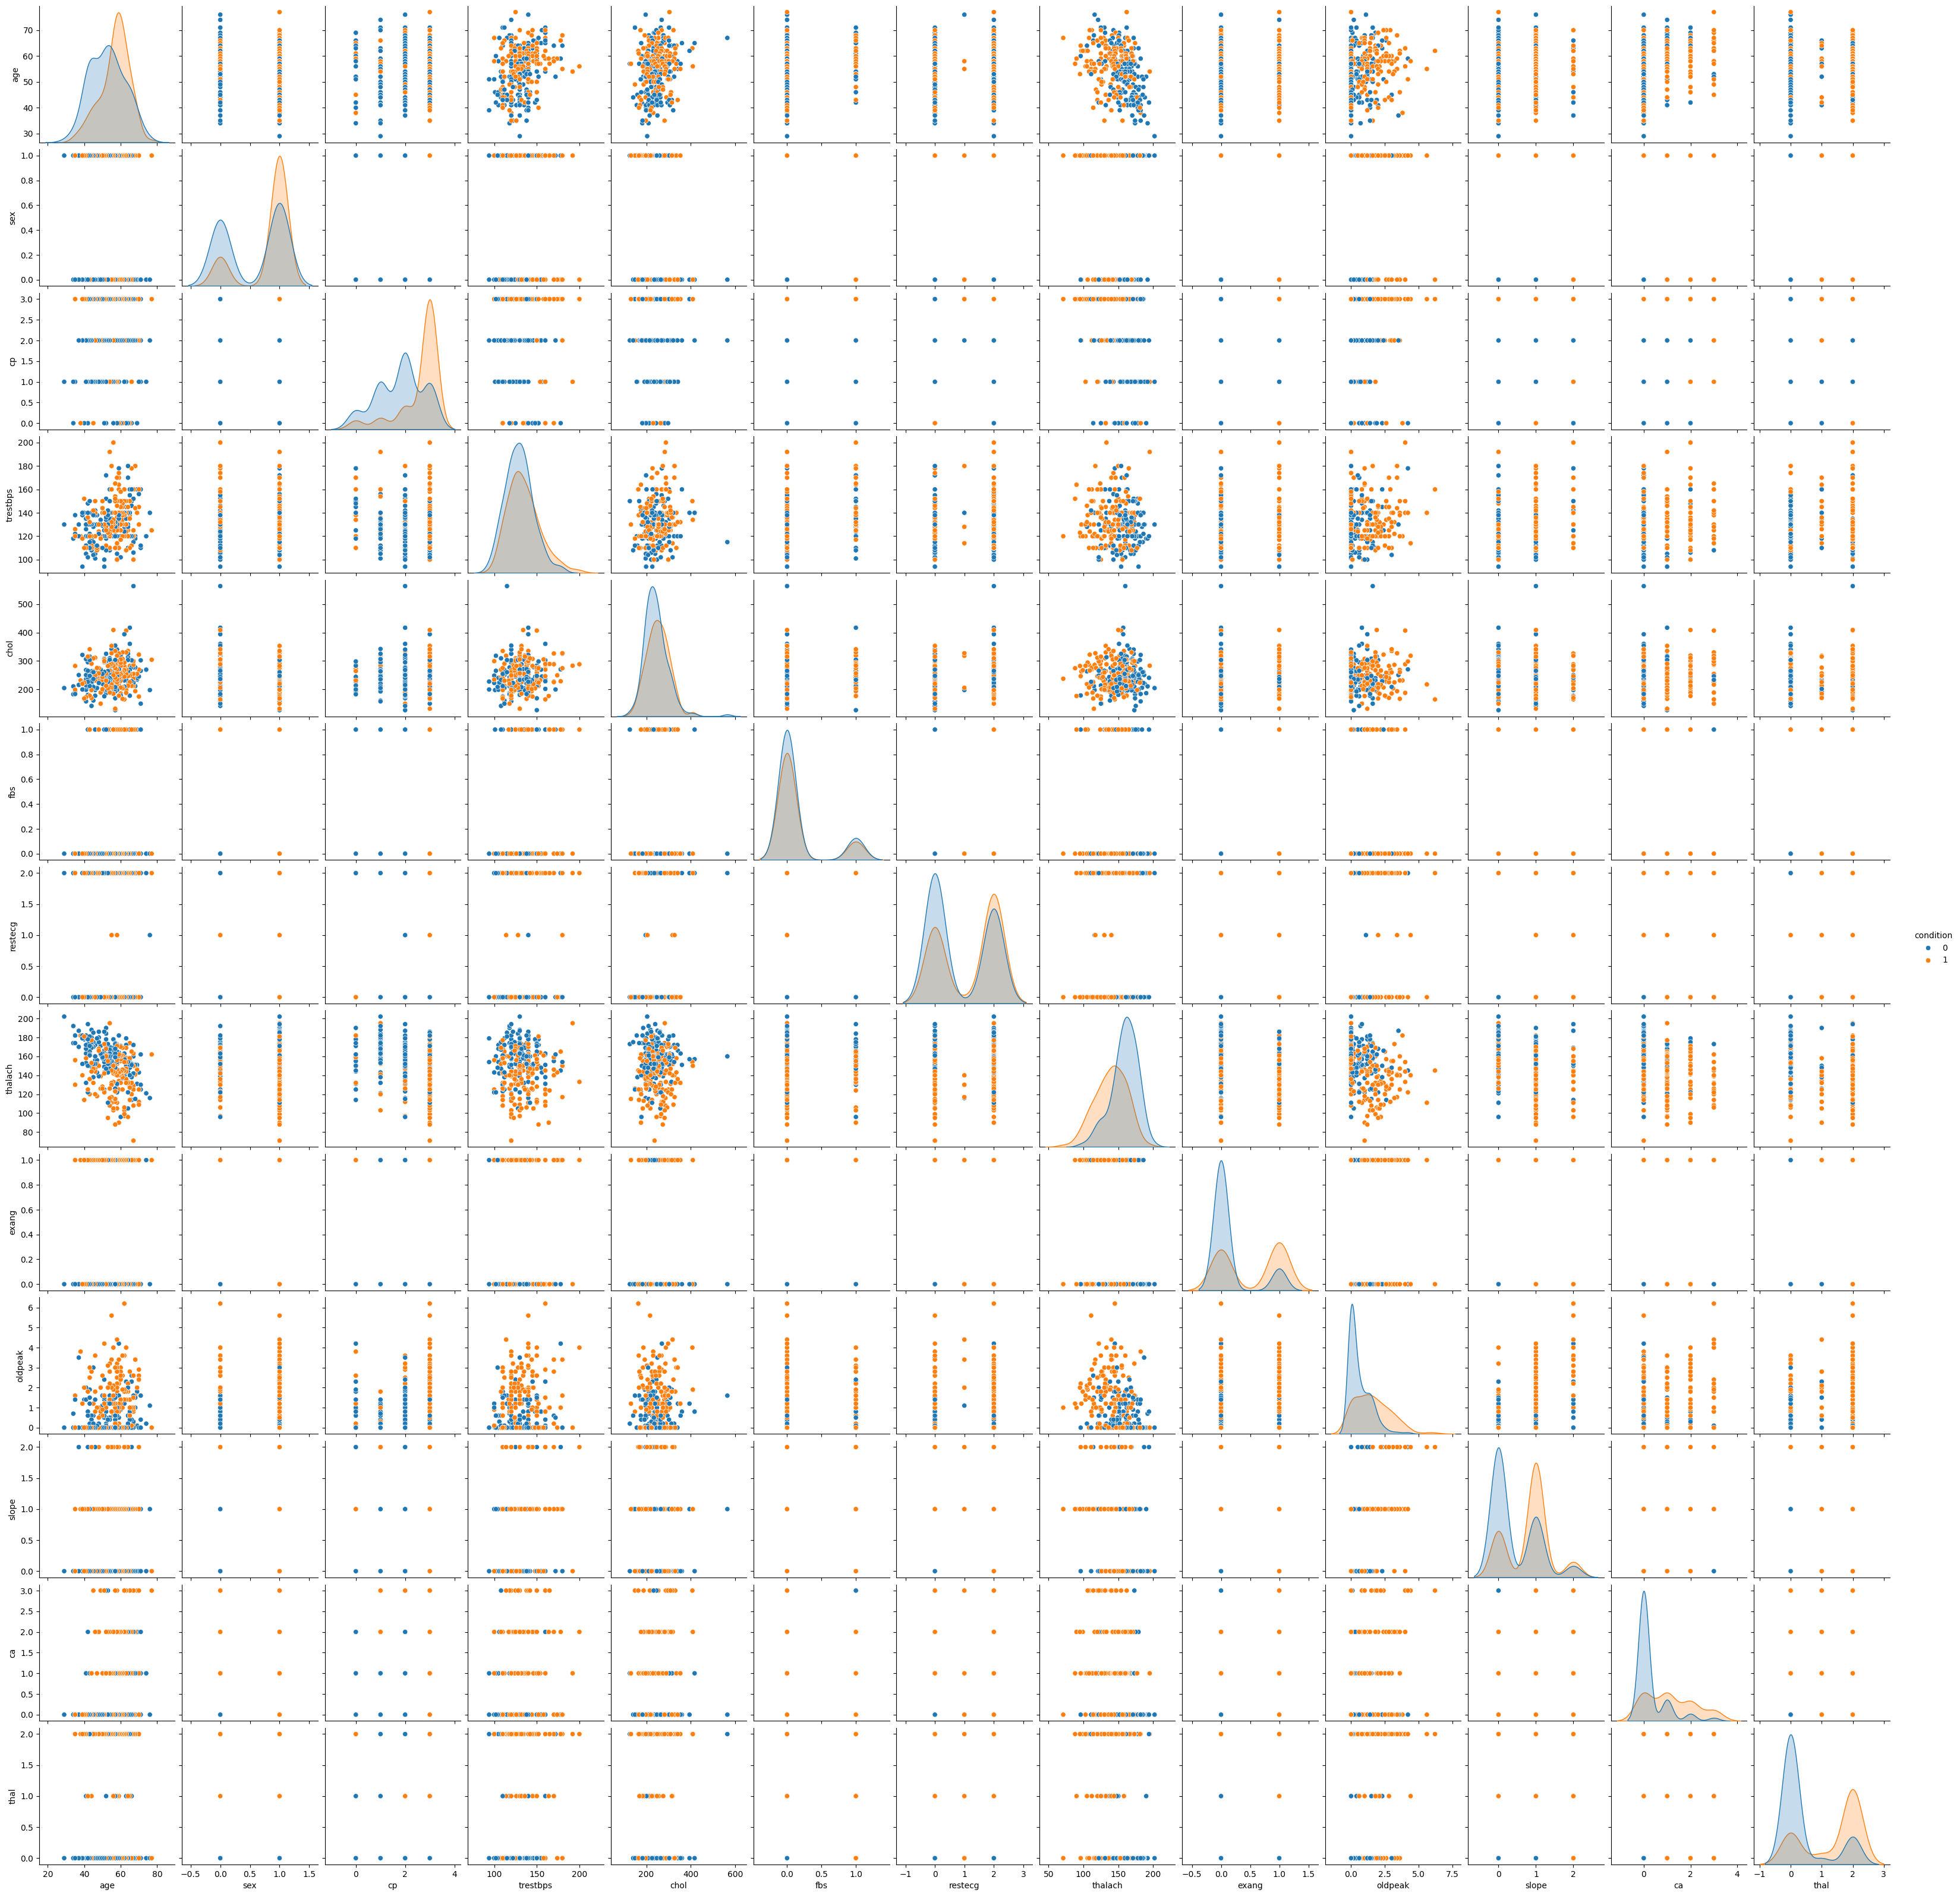

In [17]:
sns.pairplot(df, hue='condition')  # Assuming 'condition' is your target column
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['condition'])  # Features
y = df['condition']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.7333333333333333
Confusion Matrix:
[[23  9]
 [ 7 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Support Vector Machine model (SVC)
model_svm = SVC(kernel='linear', random_state=42)

# Train the model on the training data
model_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = model_svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Print the evaluation results
print(f'Accuracy: {accuracy_svm}')
print('Confusion Matrix:')
print(conf_matrix_svm)
print('Classification Report:')
print(class_report_svm)

Accuracy: 0.75
Confusion Matrix:
[[23  9]
 [ 6 22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        32
           1       0.71      0.79      0.75        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



Accuracy: 0.5666666666666667
Confusion Matrix:
[[14 18]
 [ 8 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.44      0.52        32
           1       0.53      0.71      0.61        28

    accuracy                           0.57        60
   macro avg       0.58      0.58      0.56        60
weighted avg       0.59      0.57      0.56        60



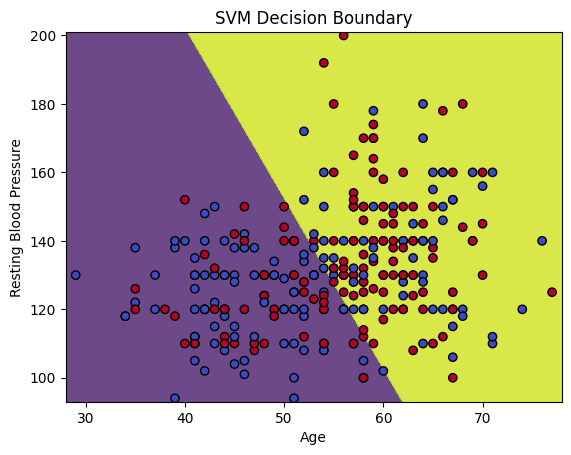

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load the dataset (here, using a simplified version for visualization)
# Replace with your dataset's features (X) and target (y)
X = df[['age', 'trestbps']].values  # You can choose other features
y = df['condition'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model_svm = SVC(kernel='linear', random_state=42)

# Train the model
model_svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = model_svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Print evaluation results
print(f'Accuracy: {accuracy_svm}')
print('Confusion Matrix:')
print(conf_matrix_svm)
print('Classification Report:')
print(class_report_svm)

# Visualize the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.title('SVM Decision Boundary')
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'kernel': ['linear', 'rbf'],  # Linear or RBF kernel
    'gamma': ['scale', 'auto'],  # Gamma value (only relevant for rbf)
}

# Create the model
model_svm = SVC()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model_svm, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.6456560283687944


In [25]:
# Get the best model
best_model = grid_search.best_estimator_

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Make predictions
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

# Print evaluation results
print(f'Accuracy of Best Model: {accuracy_best}')
print('Confusion Matrix of Best Model:')
print(conf_matrix_best)
print('Classification Report of Best Model:')
print(class_report_best)

Accuracy of Best Model: 0.55
Confusion Matrix of Best Model:
[[15 17]
 [10 18]]
Classification Report of Best Model:
              precision    recall  f1-score   support

           0       0.60      0.47      0.53        32
           1       0.51      0.64      0.57        28

    accuracy                           0.55        60
   macro avg       0.56      0.56      0.55        60
weighted avg       0.56      0.55      0.55        60



In [26]:
# Train the baseline SVM model
model_svm = SVC()
model_svm.fit(X_train, y_train)

# Predict on the test set
y_pred_baseline = model_svm.predict(X_test)

# Evaluate the baseline model
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
conf_matrix_baseline = confusion_matrix(y_test, y_pred_baseline)
class_report_baseline = classification_report(y_test, y_pred_baseline)

# Print evaluation results for baseline model
print(f'Accuracy of Baseline Model: {accuracy_baseline}')
print('Confusion Matrix of Baseline Model:')
print(conf_matrix_baseline)
print('Classification Report of Baseline Model:')
print(class_report_baseline)

Accuracy of Baseline Model: 0.5333333333333333
Confusion Matrix of Baseline Model:
[[17 15]
 [13 15]]
Classification Report of Baseline Model:
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        32
           1       0.50      0.54      0.52        28

    accuracy                           0.53        60
   macro avg       0.53      0.53      0.53        60
weighted avg       0.54      0.53      0.53        60



In [27]:
# Train the model with GridSearchCV
grid_search = GridSearchCV(estimator=model_svm, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

# Print evaluation results for the best model
print(f'Accuracy of Tuned Model: {accuracy_best}')
print('Confusion Matrix of Tuned Model:')
print(conf_matrix_best)
print('Classification Report of Tuned Model:')
print(class_report_best)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuracy of Tuned Model: 0.55
Confusion Matrix of Tuned Model:
[[15 17]
 [10 18]]
Classification Report of Tuned Model:
              precision    recall  f1-score   support

           0       0.60      0.47      0.53        32
           1       0.51      0.64      0.57        28

    accuracy                           0.55        60
   macro avg       0.56      0.56      0.55        60
weighted avg       0.56      0.55      0.55        60



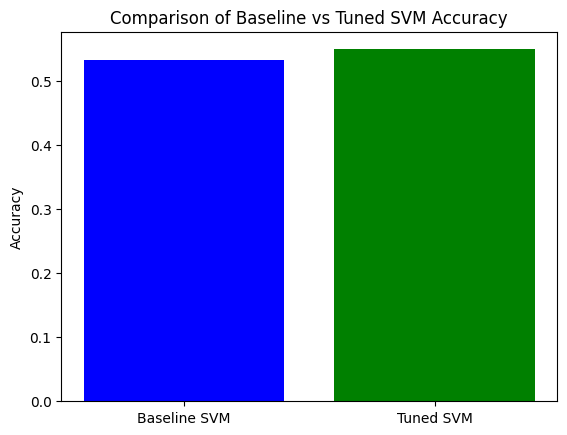

[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..................C=100, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ..................C=100, gamma=scale, kernel=linear; total time=   0.4s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=scale, kernel=linear; total time=   0.5s
[CV] END ......................C=100, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...................

Exception ignored in: <function ResourceTracker.__del__ at 0x10238d1c0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106a191c0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versi

[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .....................C=100, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=100, gamma=auto, kernel=linear; total time=   0.5s
[CV] END ...................C=100, gamma=auto, kernel=linear; total time=   0.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=scale, kernel=linear; total time=   0.6s
[CV] END ...................

Exception ignored in: <function ResourceTracker.__del__ at 0x106e611c0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x103dbd1c0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versi

[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ...................C=100, gamma=auto, kernel=linear; total time=   0.3s
[CV] END ...................C=100, gamma=auto, kernel=linear; total time=   0.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................

Exception ignored in: <function ResourceTracker.__del__ at 0x10550d1c0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10540d1c0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versi

[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   0.1s
[CV] END ......................C=100, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   0.1s
[CV] END ....................C=10, gamma=auto, kernel=linear; total time=   0.1s
[CV] END ...................

Exception ignored in: <function ResourceTracker.__del__ at 0x1035951c0>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


In [28]:
import matplotlib.pyplot as plt

# Compare the accuracy of both models
accuracies = [accuracy_baseline, accuracy_best]
models = ['Baseline SVM', 'Tuned SVM']

# Plotting the comparison
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Comparison of Baseline vs Tuned SVM Accuracy')
plt.ylabel('Accuracy')
plt.show()